In [1]:
#import dependencies 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
titanic_data = pd.read_csv('data/train.csv')


In [2]:
# Exploring Data Set
titanic_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
# to see if interger values are binary or counter
titanic_data.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


C:\Users\rache\AppData\Local\Temp\ipykernel_37128\91397034.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(titanic_data.corr(), cmap="YlGnBu")


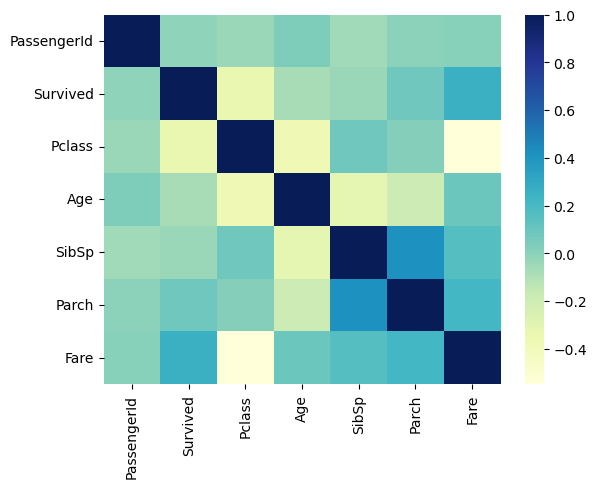

In [4]:
# corrlection to survival using heat map
sns.heatmap(titanic_data.corr(), cmap="YlGnBu")
plt.show()


In [6]:
# seprating traning and test dataset while keep them similar in values to prevent skewed test datset
# using Stratified Shuffle Split

split = StratifiedShuffleSplit (n_splits=1, test_size=0.2)
for train_indices, test_indices in split.split(titanic_data, titanic_data[["Survived", "Pclass", "Sex"]]):
    strat_train_set = titanic_data.loc[train_indices]
    strat_test_set = titanic_data.loc[test_indices]

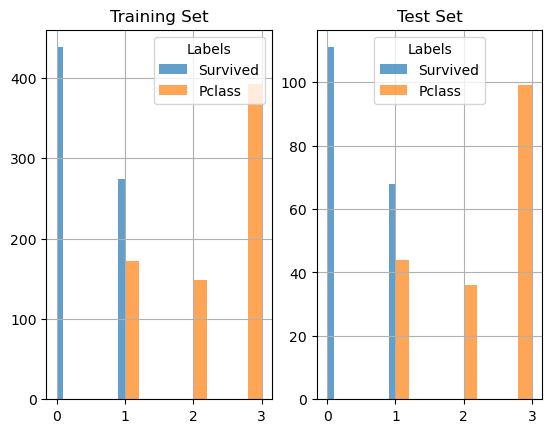

In [7]:
# verifying the split data

plt.subplot(1,2,1)


plt.title("Training Set")
strat_train_set['Survived'].hist(alpha=0.7, label='Survived')
strat_train_set['Pclass'].hist(alpha=0.7, label='Pclass')
plt.legend (loc= 'upper right', title = 'Labels')


plt.subplot (1,2,2)
plt.title("Test Set")
strat_test_set['Survived'].hist(alpha=0.7, label='Survived')
strat_test_set['Pclass'].hist(alpha=0.7, label='Pclass')


plt.legend (loc= 'best', title = 'Labels')
plt.show()

In [ ]:
# looking for missing vaules
strat_train_set.info()


In [ ]:
# changing the null vaules using sklearn in order to maintain integrity of data and not have a skewed dataset

class AgeImputer(BaseEstimator, TransformerMixin):
    
    def fit (self,X, y=None):
        return self
    
    def transform (self,X):
        imputer = SimpleImputer(strategy = "mean")
        X['Age'] = imputer.fit_transform (X[['Age']])
        return X


In [ ]:
# changing counter values to binary values for Embarked & Gender columns

class FeatureEncoder(BaseEstimator, TransformerMixin):
    
    def fit (self, X, y=None):
        return self
    
    def transform (self, X):
        encoder = OneHotEncoder()
        matrix = encoder.fit_transform(X[['Embarked']]).toarray()
        
        column_names = ["C", "S", "Q", "N"]
        
        for i in range (len(matrix.T)):
            X [column_names[i]] = matrix.T[i]
            
        matrix = encoder.fit_transform(X[["Sex"]]). toarray()
        
        column_names = ["Female", "Male"]
        
        for i in range(len(matrix.T)):
            X[column_names[i]] = matrix.T [i]
            
        return X
    


In [ ]:

# dropping columns

class FeatureDropper (BaseEstimator, TransformerMixin):
    
    def fit (self, X, y=None):
        return self 
    
    def transform (self, X):
        return X.drop(["Embarked","Name", "Ticket", "Cabin", "Sex", "N"], axis =1, errors="ignore")
pipeline = Pipeline([("ageimputer", AgeImputer()),
                     ("featureencoder",FeatureEncoder()),
                     ("featuredropper", FeatureDropper())])

strat_train_set = pipeline.fit_transform (strat_train_set)
strat_train_set 


In [ ]:
# verifying values are numerical 
strat_train_set.info()


In [ ]:
# Scaling our data
#changing our data into a numpy array 

X = strat_train_set.drop(['Survived'], axis=1)
y = strat_train_set['Survived']

scaler = StandardScaler()
X_data = scaler.fit_transform(X)
y_data = y.to_numpy()


In [ ]:
# Train Model 
# Using GridSearchCV for cross validation finding best parameters 
clf = RandomForestClassifier()

param_grid = [
    {"n_estimators": [10, 100, 200, 500], "max_depth": [None, 5, 10], "min_samples_split": [2,3,4]}
    
]



In [ ]:
grid_search = GridSearchCV(clf, param_grid, cv=3, scoring="accuracy", return_train_score=True)
grid_search.fit(X_data, y_data)
final_clf = grid_search.best_estimator_
final_clf


In [ ]:
# running test from our tain dataset 

strat_test_set = pipeline.fit_transform(strat_test_set)
strat_test_set
X_test = strat_test_set.drop(['Survived'], axis=1)
y_test = strat_test_set['Survived']

scaler = StandardScaler()
X_data_test = scaler.fit_transform(X_test)
y_data_test = y_test.to_numpy()
final_clf.score(X_data_test, y_data_test)

final_data = pipeline.fit_transform(titanic_data)


In [ ]:
# viewing our final dataset
final_data
X_final = final_data.drop (['Survived'], axis=1)
y_final = final_data['Survived'] 

scaler = StandardScaler()
X_data_final = scaler.fit_transform(X_final)
y_data_final = y_final.to_numpy()

prod_clf = RandomForestClassifier()

param_grid = [
    {"n_estimators": [10, 100, 200, 500], "max_depth": [None, 5, 10], "min_samples_split": [2,3,4]}
    
]

grid_search = GridSearchCV(prod_clf, param_grid, cv=3, scoring="accuracy", return_train_score=True)
grid_search.fit(X_data_final, y_data_final)
prod_final_clf = grid_search.best_estimator_
titanic_test_data = pd.read_csv("test.csv")
titanic_test_data
final_test_data = pipeline.fit_transform(titanic_test_data)


In [ ]:
# fills the Null Values for fare
X_final_test = final_test_data
X_final_test = X_final_test.fillna(method="ffill")

scaler = StandardScaler()
X_data_final_test = scaler.fit_transform(X_final_test)
predictions = prod_final_clf.predict(X_data_final_test)


In [ ]:
final_clf.score(X_data_test, y_data_test)

In [ ]:
#creating the final dataframe
final_df = pd.DataFrame(titanic_test_data['PassengerId'])
final_df['Survived'] = predictions
final_df.to_csv("predictions.csv", index=False)


In [ ]:
final_df